In [52]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
from data.utils import load_cured_data, split_ptb

palette_colors = {
    "yellow": "#ffd000",
    "artic_blue": "#003057",
    "clay_light": "#f89939",
    "clay": "#eb6f24",
    "clay_dark": "#b0542e",
    "terra_light": "#d1b795",
    "terra": "#aa8d6d",
    "terra_dark": "#846554",
    "leaf_light": "#5dbf90",
    "leaf": "#2ea675",
    "leaf_dark": "#33825e",
    "ruby_light": "#f56e7c",
    "ruby": "#e34858",
    "ruby_dark": "#ad0b37",
    "slate_light": "#8bb2c2",
    "slate": "#5789a4",
    "slate_dark": "#3b6579",
}

In [53]:
dataset_path = "data/processed"
ctype = "superdiagnostic"
path_mean_pred = 'outputs/mean_preds'
plot_path = "outputs/img"
plot = False
l,h = 20,10
df_res = pd.read_csv('df_res.csv')
X, Y, target_y, mlb = load_cured_data(dataset_path, ctype)
x_train, y_train, x_test, y_test = split_ptb(X, Y, target_y, test_fold=10)

In [54]:


df_res_cvae = df_res[df_res.type=='contrastive_vae']
df_res_cae = df_res[df_res.type=='contrastive_ae']
df_res_vae = df_res[df_res.type=='vae']

tmp_vae_16 = df_res_vae[df_res_vae.latent==16]
tmp_vae_32 = df_res_vae[df_res_vae.latent==32]
tmp_vae_64 = df_res_vae[df_res_vae.latent==64]

tmp_cae_16 = df_res_cae[df_res_cae.latent==16]
tmp_cae_32 = df_res_cae[df_res_cae.latent==32]
tmp_cae_64 = df_res_cae[df_res_cae.latent==64]

tmp_cae_mean_32 = tmp_cae_32.groupby('salient').mean()
tmp_cae_std_32 = tmp_cae_32.groupby('salient').std()


tmp_df_16 = df_res_cvae[df_res_cvae.latent==16]
tmp_mean_16 = tmp_df_16.groupby('salient').mean()
tmp_median_16 = tmp_df_16.groupby('salient').median()
tmp_std_16 = tmp_df_16.groupby('salient').std()

tmp_df_32 = df_res_cvae[df_res_cvae.latent==32]
tmp_mean_32 = tmp_df_32.groupby('salient').mean()
tmp_median_32 = tmp_df_32.groupby('salient').median()
tmp_std_32 = tmp_df_32.groupby('salient').std()

tmp_df_64 = df_res_cvae[df_res_cvae.latent==64]
tmp_mean_64 = tmp_df_64.groupby('salient').mean()
tmp_median_64 = tmp_df_64.groupby('salient').median()
tmp_std_64 = tmp_df_64.groupby('salient').std()


df_mean_pred_16 = pd.read_csv(f'{path_mean_pred}/df_res_mean_vae_ld-16_contrastive_salient-4_rs-0_sub')
df_mean_pred_32 = pd.read_csv(f'{path_mean_pred}/df_res_mean_vae_ld-32_contrastive_salient-8_rs-1_sub')
df_mean_pred_64 = pd.read_csv(f'{path_mean_pred}/df_res_mean_vae_ld-64_contrastive_salient-32_rs-3_sub')

df_mean_pred_16 = df_mean_pred_16[df_mean_pred_16.step!='Reconstructed'].set_index(["original_label", "step"], inplace=False)
df_mean_pred_32 = df_mean_pred_32[df_mean_pred_32.step!='Reconstructed'].set_index(["original_label", "step"], inplace=False)
df_mean_pred_64 = df_mean_pred_64[df_mean_pred_64.step!='Reconstructed'].set_index(["original_label", "step"], inplace=False)

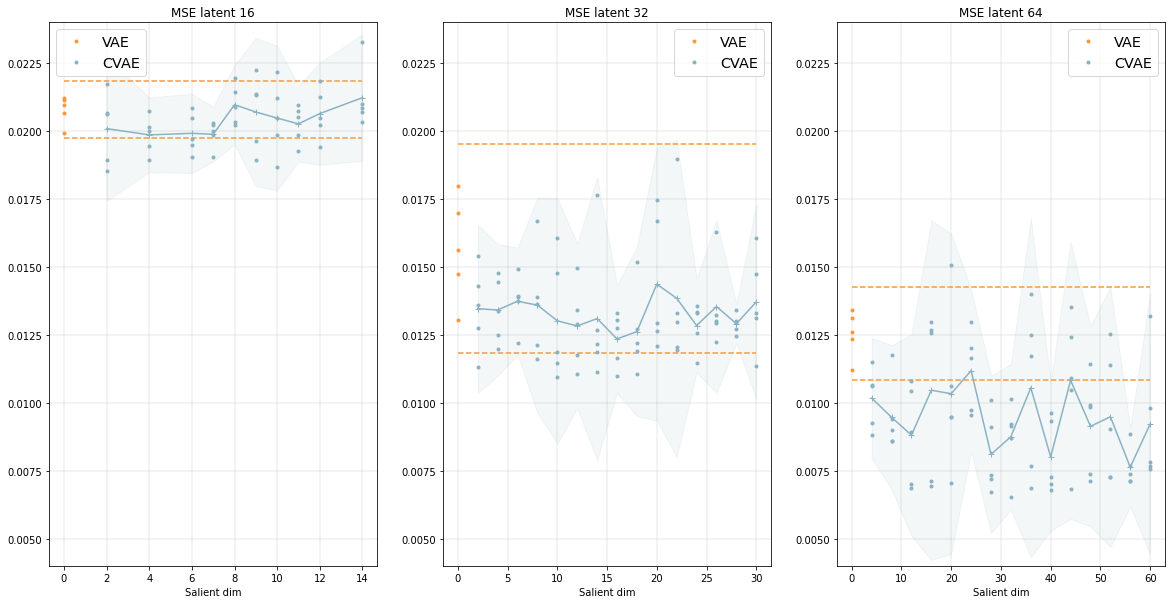

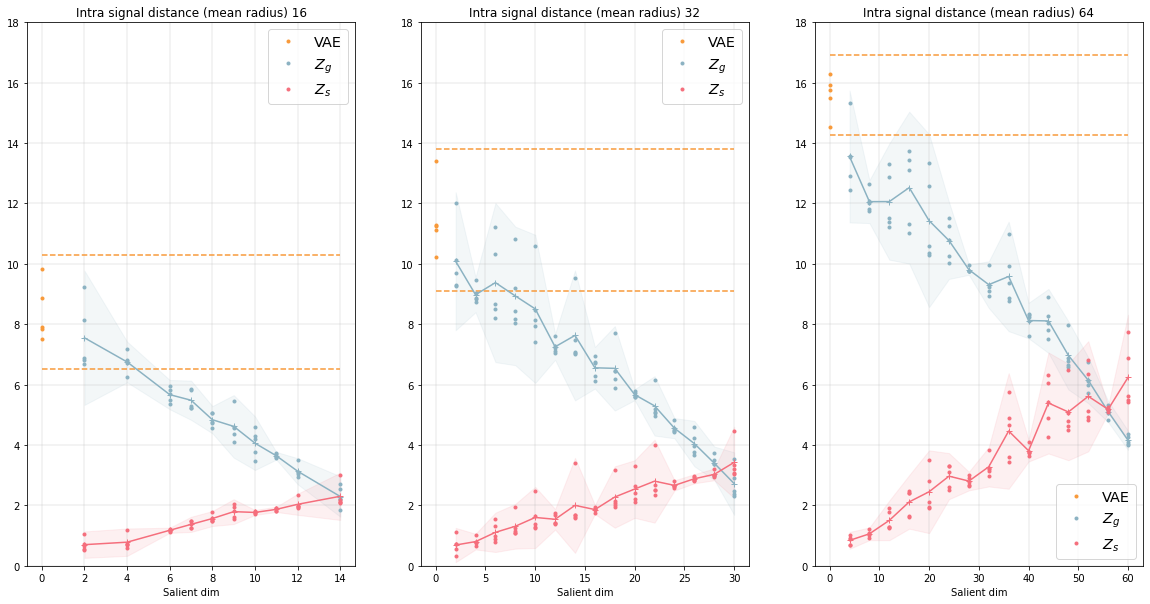

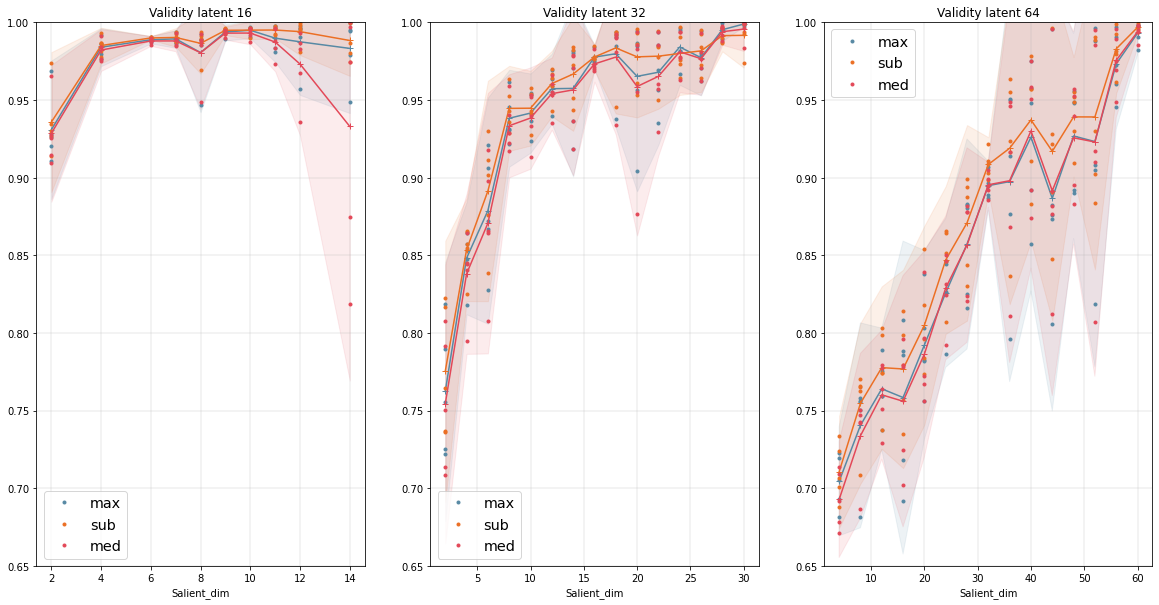

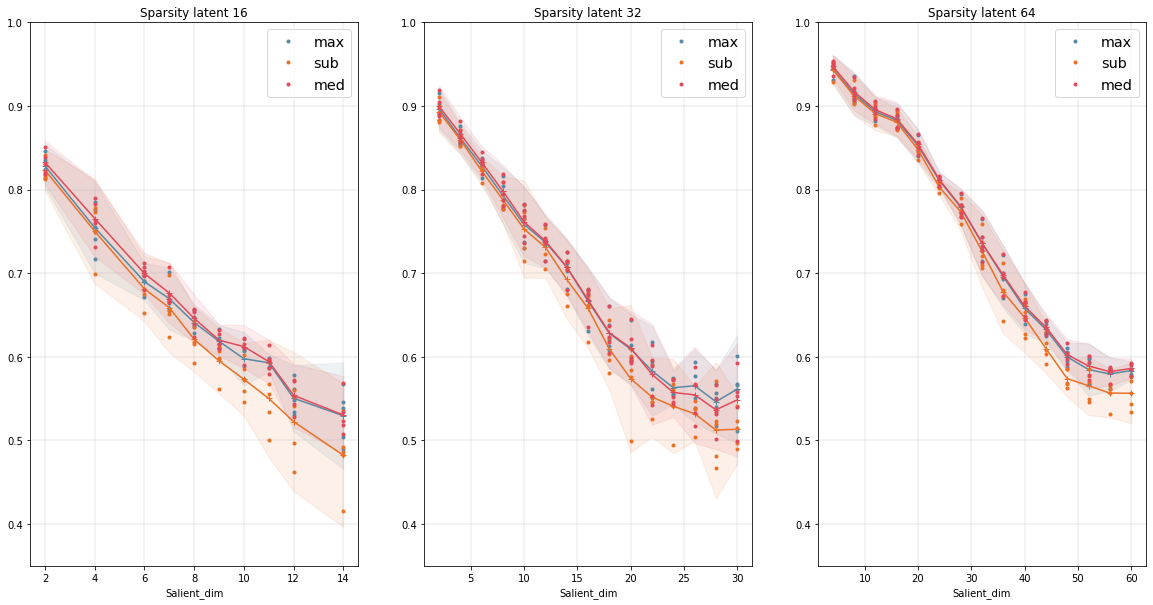

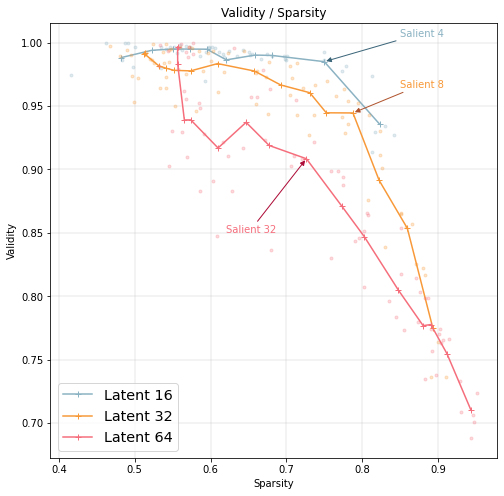

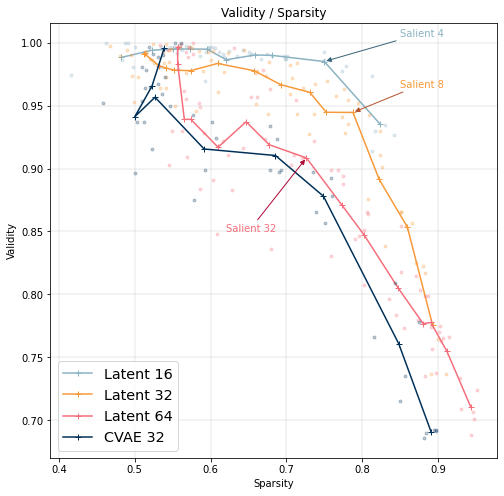

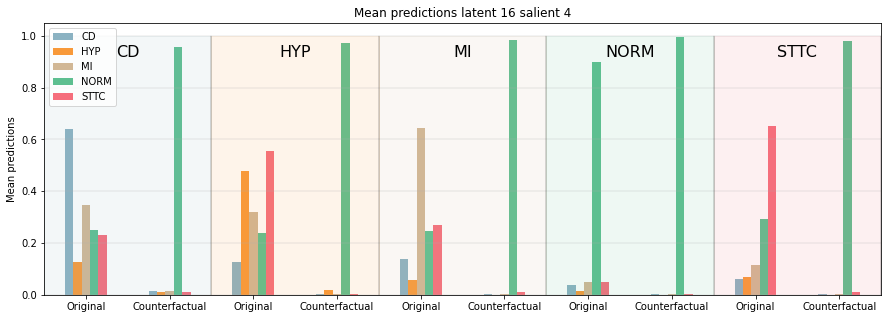

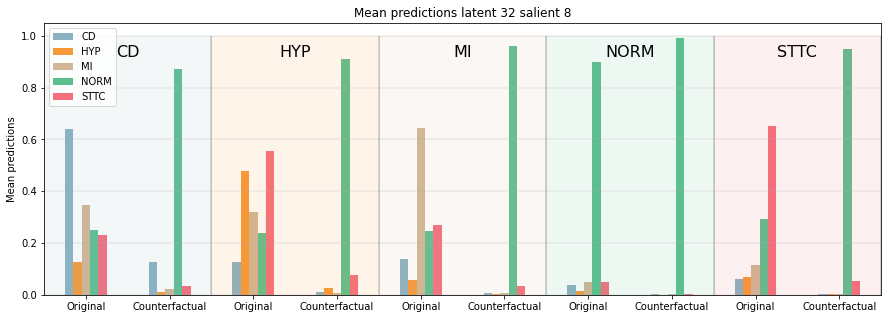

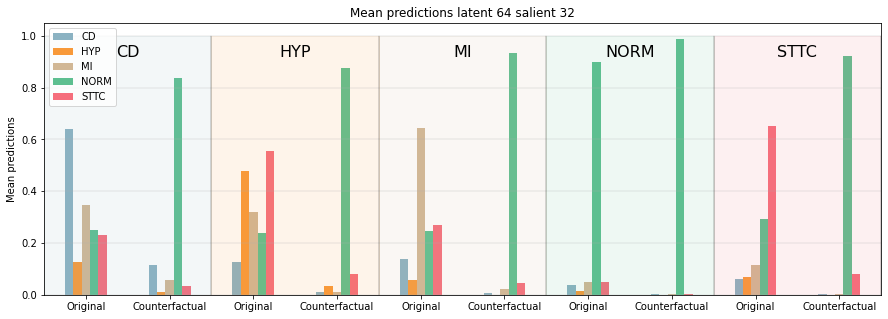

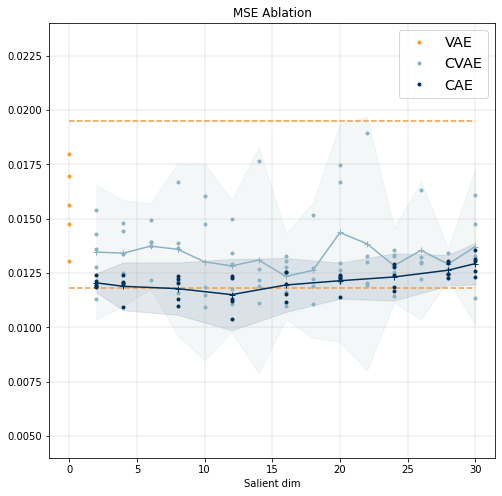

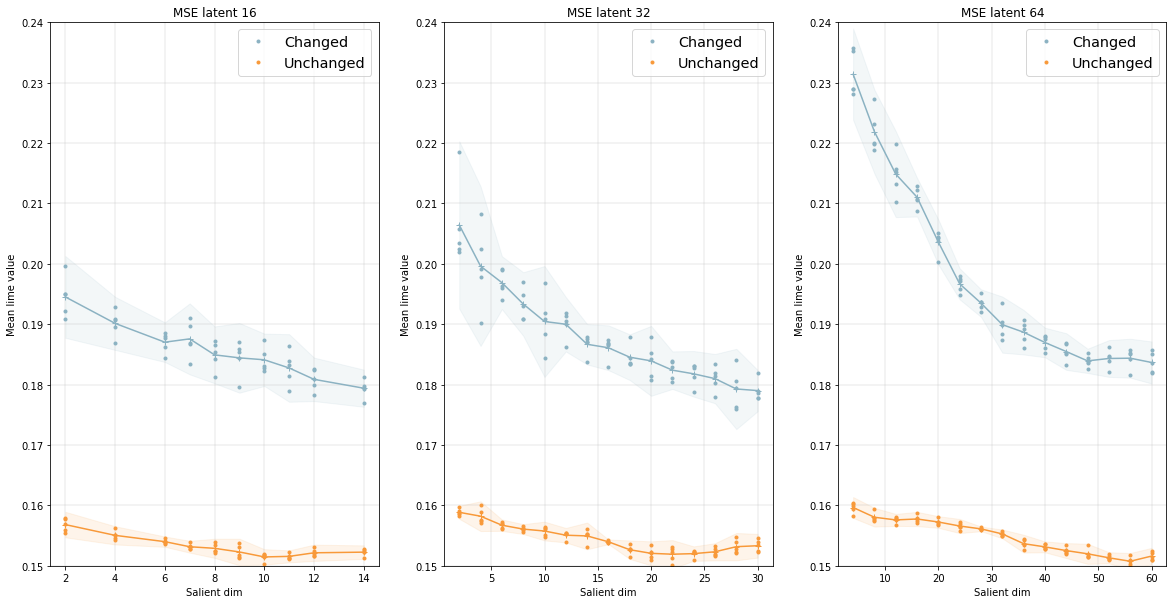

In [57]:
plot = True
dpi=150
plt.figure(figsize=(l,h))
for i, (tmp_df, tmp_mean, tmp_std, tmp_vae, ld) in enumerate(zip(
    [tmp_df_16, tmp_df_32, tmp_df_64],
    [tmp_mean_16, tmp_mean_32, tmp_mean_64],
    [tmp_std_16, tmp_std_32, tmp_std_64],
    [tmp_vae_16, tmp_vae_32, tmp_vae_64],
    [16,32,64])):
    plt.subplot(1,3,i+1)
    plt.title(f'MSE latent {ld}')
    plt.grid(linewidth=.3)
    plt.plot([0,0,0,0,0], tmp_vae.mse,'.',color=palette_colors['clay_light'],  label='VAE')
    plt.plot([0,tmp_df.salient.max()], [tmp_vae.mse.mean()+2*tmp_vae.mse.std(), tmp_vae.mse.mean()+2*tmp_vae.mse.std()],'--',color=palette_colors['clay_light'])
    plt.plot([0,tmp_df.salient.max()], [tmp_vae.mse.mean()-2*tmp_vae.mse.std(), tmp_vae.mse.mean()-2*tmp_vae.mse.std()],'--',color=palette_colors['clay_light'])
    
    plt.plot(tmp_df.salient, tmp_df.mse,'.',color=palette_colors['slate_light'],  label='CVAE')
    plt.plot(tmp_mean.mse,'+-',color=palette_colors['slate_light'])
    plt.fill_between(tmp_mean.index,tmp_mean.mse+2*tmp_std.mse,tmp_mean.mse-2*tmp_std.mse,color=palette_colors['slate_light'], alpha=.1)
    plt.legend(fontsize="x-large")
    plt.xlabel('Salient dim')
    plt.ylim(0.004,0.024)
if plot:
    plt.savefig(f'{plot_path}/mse.png', dpi=dpi)
else : 
    plt.show()

    
plt.figure(figsize=(l,h))
for i, (tmp_df, tmp_mean, tmp_std, tmp_vae, ld) in enumerate(zip(
    [tmp_df_16, tmp_df_32, tmp_df_64],
    [tmp_mean_16, tmp_mean_32, tmp_mean_64],
    [tmp_std_16, tmp_std_32, tmp_std_64],
    [tmp_vae_16, tmp_vae_32, tmp_vae_64],
    [16,32,64])):
    plt.subplot(1,3,i+1)
    plt.title(f'Intra signal distance (mean radius) {ld}')
    plt.grid(linewidth=.3)
    plt.plot([0,0,0,0,0], tmp_vae.mean_radius_z,'.',color=palette_colors['clay_light'],  label='VAE')
    plt.plot([0,tmp_df.salient.max()], [tmp_vae.mean_radius_z.mean()+2*tmp_vae.mean_radius_z.std(), tmp_vae.mean_radius_z.mean()+2*tmp_vae.mean_radius_z.std()],'--',color=palette_colors['clay_light'])
    plt.plot([0,tmp_df.salient.max()], [tmp_vae.mean_radius_z.mean()-2*tmp_vae.mean_radius_z.std(), tmp_vae.mean_radius_z.mean()-2*tmp_vae.mean_radius_z.std()],'--',color=palette_colors['clay_light'])
    
    plt.plot(tmp_df.salient, tmp_df.mean_radius_zg,'.',color=palette_colors['slate_light'],  label=f'$Z_g$')
    #plt.plot(tmp_cae.salient, tmp_cae.mean_radius_zg,'+',color=palette_colors[f'{color}_light'],  label=f'cae$Z_g$')
    #plt.plot(tmp_cae.salient, tmp_cae.mean_radius_zs,'D',color=palette_colors[f'{color}_light'],  label=f'cae$Z_g$')
    plt.plot(tmp_mean.mean_radius_zg,'+-',color=palette_colors['slate_light'])
    plt.fill_between(tmp_mean.index,tmp_mean.mean_radius_zg+2*tmp_std.mean_radius_zg,tmp_mean.mean_radius_zg-2*tmp_std.mean_radius_zg,color=palette_colors['slate_light'], alpha=.1)
    plt.plot(tmp_df.salient, tmp_df.mean_radius_zs,'.',color=palette_colors['ruby_light'],  label=f'$Z_s$')
    plt.plot(tmp_mean.mean_radius_zs,'+-',color=palette_colors['ruby_light'])
    plt.fill_between(tmp_mean.index,tmp_mean.mean_radius_zs+2*tmp_std.mean_radius_zs,tmp_mean.mean_radius_zs-2*tmp_std.mean_radius_zs,color=palette_colors['ruby_light'], alpha=.1)
    plt.legend(fontsize="x-large")
    plt.xlabel('Salient dim')
    plt.ylim(0,18)
if plot:
    plt.savefig(f'{plot_path}/intra_dist_radius.png', dpi=dpi)
else : 
    plt.show()
    
plt.figure(figsize=(l,h))
for i, (tmp_df, tmp_mean, tmp_std, ld) in enumerate(zip(
    [tmp_df_16, tmp_df_32, tmp_df_64],
    [tmp_mean_16, tmp_mean_32, tmp_mean_64],
    [tmp_std_16, tmp_std_32, tmp_std_64],
    [16,32,64])):
    plt.subplot(1,3,i+1)
    
    plt.title(f'Validity latent {ld}')
    class_type='NORM'
    plt.grid(linewidth=.3)
    for cf_type, color  in zip(['max', 'sub', 'med'], [palette_colors['slate'], palette_colors['clay'], palette_colors['ruby']]):
        plt.plot(tmp_df.salient, tmp_df[f'acc_cf_no_target_{cf_type}_{class_type}'],'.',color=color,  label=cf_type)
        #plt.plot(tmp_cae.salient, tmp_cae[f'sparsity_rec_cf_{cf_type}_{class_type}'],'.',color='k',  label='cae')
        plt.plot(tmp_mean[f'acc_cf_no_target_{cf_type}_{class_type}'],'+-',color=color)
        plt.fill_between(tmp_mean.index,tmp_mean[f'acc_cf_no_target_{cf_type}_{class_type}']+2*tmp_std[f'acc_cf_no_target_{cf_type}_{class_type}'],tmp_mean[f'acc_cf_no_target_{cf_type}_{class_type}']-2*tmp_std[f'acc_cf_no_target_{cf_type}_{class_type}'],color=color, alpha=.1)
    plt.legend(fontsize="x-large")
    plt.xlabel('Salient_dim')
    plt.ylim(0.65,1)
    
if plot:
    plt.savefig(f'{plot_path}/Validity.png', dpi=dpi)
else : 
    plt.show()
    

plt.figure(figsize=(l,h))
for i, (tmp_df, tmp_mean, tmp_std, ld) in enumerate(zip(
    [tmp_df_16, tmp_df_32, tmp_df_64],
    [tmp_mean_16, tmp_mean_32, tmp_mean_64],
    [tmp_std_16, tmp_std_32, tmp_std_64],
    [16,32,64])):
    plt.subplot(1,3,i+1)
    
    plt.title(f'Sparsity latent {ld}')
    class_type='NORM'
    plt.grid(linewidth=.3)
    for cf_type, color  in zip(['max', 'sub', 'med'], [palette_colors['slate'], palette_colors['clay'], palette_colors['ruby']]):
        plt.plot(tmp_df.salient, tmp_df[f'sparsity_rec_cf_{cf_type}_{class_type}'],'.',color=color,  label=cf_type)
        #plt.plot(tmp_cae.salient, tmp_cae[f'sparsity_rec_cf_{cf_type}_{class_type}'],'.',color='k',  label='cae')
        plt.plot(tmp_mean[f'sparsity_rec_cf_{cf_type}_{class_type}'],'+-',color=color)
        plt.fill_between(tmp_mean.index,tmp_mean[f'sparsity_rec_cf_{cf_type}_{class_type}']+2*tmp_std[f'sparsity_rec_cf_{cf_type}_{class_type}'],tmp_mean[f'sparsity_rec_cf_{cf_type}_{class_type}']-2*tmp_std[f'sparsity_rec_cf_{cf_type}_{class_type}'],color=color, alpha=.1)
    plt.legend(fontsize="x-large")
    plt.ylim(.35,1)
    plt.xlabel('Salient_dim')
    
if plot:
    plt.savefig(f'{plot_path}/sparsity.png', dpi=dpi)
else : 
    plt.show()
    

plt.figure(figsize=(8,8))
plt.title('Validity / Sparsity')
for i, (tmp_df, tmp_mean, tmp_std, color, ld) in enumerate(zip(
    [tmp_df_16, tmp_df_32, tmp_df_64],
    [tmp_mean_16, tmp_mean_32, tmp_mean_64],
    [tmp_std_16, tmp_std_32, tmp_std_64],
    ['slate','clay','ruby'],
    [16,32,64])):
    
    class_type='NORM'
    cf_type='sub'
    plt.grid(linewidth=.3)
    plt.plot(tmp_df[f'sparsity_rec_cf_{cf_type}_{class_type}'],tmp_df[f'acc_cf_no_target_{cf_type}_{class_type}'],'.',color=palette_colors[f'{color}_light'], alpha=.25)
    plt.plot(tmp_mean[f'sparsity_rec_cf_{cf_type}_{class_type}'],tmp_mean[f'acc_cf_no_target_{cf_type}_{class_type}'],'+-',color=palette_colors[f'{color}_light'], label=f'Latent {ld}')

plt.legend(fontsize="x-large")
plt.xlabel('Sparsity')
plt.ylabel('Validity')

tmp_df_mean = tmp_mean_16[tmp_mean_16.index==4]
x_coord, y_coord = tmp_df_mean[f'sparsity_rec_cf_sub_NORM'].values[0],tmp_df_mean[f'acc_cf_no_target_sub_NORM'].values[0]
plt.annotate('Salient 4', xy=(x_coord, y_coord),  xycoords='data', xytext = (.85, y_coord+0.02), color=palette_colors[f'slate_light'],
            arrowprops=dict(color=palette_colors[f'slate_dark'],arrowstyle='-|>'))
tmp_df_mean = tmp_mean_32[tmp_mean_32.index==8]
x_coord, y_coord = tmp_df_mean[f'sparsity_rec_cf_sub_NORM'].values[0],tmp_df_mean[f'acc_cf_no_target_sub_NORM'].values[0]
plt.annotate('Salient 8', xy=(x_coord, y_coord),  xycoords='data', xytext = (.85, y_coord+0.02), color=palette_colors[f'clay_light'],
            arrowprops=dict(color=palette_colors[f'clay_dark'],arrowstyle='-|>'))
tmp_df_mean = tmp_mean_64[tmp_mean_64.index==32]
x_coord, y_coord = tmp_df_mean[f'sparsity_rec_cf_sub_NORM'].values[0],tmp_df_mean[f'acc_cf_no_target_sub_NORM'].values[0]
plt.annotate('Salient 32', xy=(x_coord, y_coord),  xycoords='data', xytext = (.62, .85), color=palette_colors[f'ruby_light'],
            arrowprops=dict(color=palette_colors[f'ruby_dark'],arrowstyle='-|>'))

if plot:
    plt.savefig(f'{plot_path}/sparsity-validity.png', dpi=dpi)
else : 
    plt.show()

plt.figure(figsize=(8,8))
plt.title('Validity / Sparsity')
for i, (tmp_df, tmp_mean, tmp_std, color, ld) in enumerate(zip(
    [tmp_df_16, tmp_df_32, tmp_df_64],
    [tmp_mean_16, tmp_mean_32, tmp_mean_64],
    [tmp_std_16, tmp_std_32, tmp_std_64],
    ['slate','clay','ruby'],
    [16,32,64])):
    
    class_type='NORM'
    cf_type='sub'
    plt.grid(linewidth=.3)
    plt.plot(tmp_df[f'sparsity_rec_cf_{cf_type}_{class_type}'],tmp_df[f'acc_cf_no_target_{cf_type}_{class_type}'],'.',color=palette_colors[f'{color}_light'], alpha=.25)
    plt.plot(tmp_mean[f'sparsity_rec_cf_{cf_type}_{class_type}'],tmp_mean[f'acc_cf_no_target_{cf_type}_{class_type}'],'+-',color=palette_colors[f'{color}_light'], label=f'Latent {ld}')
    
plt.plot(tmp_cae_32[f'sparsity_rec_cf_{cf_type}_{class_type}'],tmp_cae_32[f'acc_cf_no_target_{cf_type}_{class_type}'],'.',color=palette_colors[f'artic_blue'], alpha=.25)
plt.plot(tmp_cae_mean_32[f'sparsity_rec_cf_{cf_type}_{class_type}'],tmp_cae_mean_32[f'acc_cf_no_target_{cf_type}_{class_type}'],'+-',color=palette_colors[f'artic_blue'], label=f'CVAE 32')

plt.legend(fontsize="x-large")
plt.xlabel('Sparsity')
plt.ylabel('Validity')

tmp_df_mean = tmp_mean_16[tmp_mean_16.index==4]
x_coord, y_coord = tmp_df_mean[f'sparsity_rec_cf_sub_NORM'].values[0],tmp_df_mean[f'acc_cf_no_target_sub_NORM'].values[0]
plt.annotate('Salient 4', xy=(x_coord, y_coord),  xycoords='data', xytext = (.85, y_coord+0.02), color=palette_colors[f'slate_light'],
            arrowprops=dict(color=palette_colors[f'slate_dark'],arrowstyle='-|>'))
tmp_df_mean = tmp_mean_32[tmp_mean_32.index==8]
x_coord, y_coord = tmp_df_mean[f'sparsity_rec_cf_sub_NORM'].values[0],tmp_df_mean[f'acc_cf_no_target_sub_NORM'].values[0]
plt.annotate('Salient 8', xy=(x_coord, y_coord),  xycoords='data', xytext = (.85, y_coord+0.02), color=palette_colors[f'clay_light'],
            arrowprops=dict(color=palette_colors[f'clay_dark'],arrowstyle='-|>'))
tmp_df_mean = tmp_mean_64[tmp_mean_64.index==32]
x_coord, y_coord = tmp_df_mean[f'sparsity_rec_cf_sub_NORM'].values[0],tmp_df_mean[f'acc_cf_no_target_sub_NORM'].values[0]
plt.annotate('Salient 32', xy=(x_coord, y_coord),  xycoords='data', xytext = (.62, .85), color=palette_colors[f'ruby_light'],
            arrowprops=dict(color=palette_colors[f'ruby_dark'],arrowstyle='-|>'))

if plot:
    plt.savefig(f'{plot_path}/sparsity-validity_ablation.png', dpi=dpi)
else : 
    plt.show()

    
colors = [
    palette_colors['slate_light'],
    palette_colors['clay_light'],
    palette_colors['terra_light'],
    palette_colors['leaf_light'],
    palette_colors['ruby_light']
]


df_mean_pred_16.plot.bar(figsize=(15,5), color=colors)
plt.title(f"Mean predictions latent 16 salient 4")
for i, x_tick in enumerate(np.arange(1.5, 10, 2)):
    plt.plot([x_tick,x_tick],[0,1], 'k', linewidth=.3)
    plt.fill([x_tick-2,x_tick-2,x_tick,x_tick], [0,1,1,0], color=colors[i], alpha=.1)
    plt.text(x_tick-1, .92, mlb.classes_[i], fontsize=16, horizontalalignment='center')
plt.grid(axis='y',linewidth=.3)
plt.ylabel('Mean predictions')
plt.xlabel('')
plt.xticks(ticks=list(range(10)), labels=5*['Original','Counterfactual'], rotation=0)
if plot:
    plt.savefig(f'{plot_path}/mean_pred_16.png', dpi=dpi)
else : 
    plt.show()
    
df_mean_pred_32.plot.bar(figsize=(15,5), color=colors)
plt.title(f"Mean predictions latent 32 salient 8")
for i, x_tick in enumerate(np.arange(1.5, 10, 2)):
    plt.plot([x_tick,x_tick],[0,1], 'k', linewidth=.3)
    plt.fill([x_tick-2,x_tick-2,x_tick,x_tick], [0,1,1,0], color=colors[i], alpha=.1)
    plt.text(x_tick-1, .92, mlb.classes_[i], fontsize=16, horizontalalignment='center')
plt.grid(axis='y',linewidth=.3)
plt.ylabel('Mean predictions')
plt.xlabel('')
plt.xticks(ticks=list(range(10)), labels=5*['Original','Counterfactual'], rotation=0)
if plot:
    plt.savefig(f'{plot_path}/mean_pred_32.png', dpi=300)
else : 
    plt.show()
    
df_mean_pred_64.plot.bar(figsize=(15,5), color=colors)
plt.title(f"Mean predictions latent 64 salient 32")
for i, x_tick in enumerate(np.arange(1.5, 10, 2)):
    plt.plot([x_tick,x_tick],[0,1], 'k', linewidth=.3)
    plt.fill([x_tick-2,x_tick-2,x_tick,x_tick], [0,1,1,0], color=colors[i], alpha=.1)
    plt.text(x_tick-1, .92, mlb.classes_[i], fontsize=16, horizontalalignment='center')
plt.grid(axis='y',linewidth=.3)
plt.ylabel('Mean predictions')
plt.xlabel('')
plt.xticks(ticks=list(range(10)), labels=5*['Original','Counterfactual'], rotation=0)
if plot:
    plt.savefig(f'{plot_path}/mean_pred_64.png', dpi=dpi)
else : 
    plt.show()
    
    
    
plt.figure(figsize=(8,8))
plt.title(f'MSE Ablation')
plt.grid(linewidth=.3)

plt.plot([0,0,0,0,0], tmp_vae_32.mse,'.',color=palette_colors['clay_light'],  label='VAE')
plt.plot([0,tmp_df_32.salient.max()], [tmp_vae_32.mse.mean()+2*tmp_vae_32.mse.std(), tmp_vae_32.mse.mean()+2*tmp_vae_32.mse.std()],'--',color=palette_colors['clay_light'])
plt.plot([0,tmp_df_32.salient.max()], [tmp_vae_32.mse.mean()-2*tmp_vae_32.mse.std(), tmp_vae_32.mse.mean()-2*tmp_vae_32.mse.std()],'--',color=palette_colors['clay_light'])
    
plt.plot(tmp_df_32.salient, tmp_df_32.mse,'.',color=palette_colors['slate_light'],  label='CVAE')
plt.plot(tmp_mean_32.mse,'+-',color=palette_colors['slate_light'])
plt.fill_between(tmp_mean_32.index,tmp_mean_32.mse+2*tmp_std_32.mse,tmp_mean_32.mse-2*tmp_std_32.mse,color=palette_colors['slate_light'], alpha=.1)

plt.plot(tmp_cae_32.salient, tmp_cae_32.mse,'.',color=palette_colors['artic_blue'],  label='CAE')
plt.plot(tmp_cae_mean_32.mse,'+-',color=palette_colors['artic_blue'])
plt.fill_between(tmp_cae_mean_32.index,tmp_cae_mean_32.mse+2*tmp_cae_std_32.mse,tmp_cae_mean_32.mse-2*tmp_cae_std_32.mse,color=palette_colors['artic_blue'], alpha=.1)

plt.legend(fontsize="x-large")
plt.xlabel('Salient dim')
plt.ylim(0.004,0.024)
if plot:
    plt.savefig(f'{plot_path}/mse_ablation.png', dpi=dpi)
else : 
    plt.show()
    
plt.figure(figsize=(l,h))
for i, (tmp_df, tmp_mean, tmp_std, tmp_vae, ld) in enumerate(zip(
    [tmp_df_16, tmp_df_32, tmp_df_64],
    [tmp_mean_16, tmp_mean_32, tmp_mean_64],
    [tmp_std_16, tmp_std_32, tmp_std_64],
    [tmp_vae_16, tmp_vae_32, tmp_vae_64],
    [16,32,64])):
    plt.subplot(1,3,i+1)
    plt.title(f'MSE latent {ld}')
    plt.grid(linewidth=.3)

    plt.plot(tmp_df.salient, tmp_df.mean_lime_changed_sub,'.',color=palette_colors['slate_light'],  label='Changed')
    plt.plot(tmp_mean.mean_lime_changed_sub,'+-',color=palette_colors['slate_light'])
    plt.fill_between(tmp_mean.index,tmp_mean.mean_lime_changed_sub+2*tmp_std.mean_lime_changed_sub,tmp_mean.mean_lime_changed_sub-2*tmp_std.mean_lime_changed_sub,color=palette_colors['slate_light'], alpha=.1)
    
    plt.plot(tmp_df.salient, tmp_df.mean_lime_unchanged_sub,'.',color=palette_colors['clay_light'],  label='Unchanged')
    plt.plot(tmp_mean.mean_lime_unchanged_sub,'+-',color=palette_colors['clay_light'])
    plt.fill_between(tmp_mean.index,tmp_mean.mean_lime_unchanged_sub+2*tmp_std.mean_lime_unchanged_sub,tmp_mean.mean_lime_unchanged_sub-2*tmp_std.mean_lime_unchanged_sub,color=palette_colors['clay_light'], alpha=.1)
    
    
    plt.legend(fontsize="x-large")
    plt.xlabel('Salient dim')
    plt.ylabel('Mean lime value')
    plt.ylim(0.15,0.24)
if plot:
    plt.savefig(f'{plot_path}/lime_mean.png', dpi=dpi)
else : 
    plt.show()

### Counterfactuals examples

In [48]:
import pickle
import torch
import json
from src.vae_utils import get_reconstruction_error, get_validation_outputs
from src.eval_utils import *

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


model_path_32 = 'models/contrastive_vae/vae_ld-32_contrastive_salient-8_rs-1'


baseline_model = pickle.load(
    open("models/baseline_cnn/model.pkl", "rb")
)
baseline_model = baseline_model.to(device)

for model_path in [model_path_32]:
    model_name = model_path.split("/")[-1]
    model_type = model_path.split("/")[6]

    with open(f"{model_path}/model_params.json", "r") as f:
        model_params = json.load(f)
    with open(f"{model_path}/training_params.json", "r") as f:
        training_params = json.load(f)
    latent_dim = model_params["latent_dim"]
    try:
        salient_dim = training_params["salient_dim"]
    except:
        salient_dim = 0
    
    
    gen_dim = latent_dim - salient_dim
    
    model = pickle.load(open(f"{model_path}/model.pkl", "rb"))
    model = model.to(device)
    model.load_best()
    
    
    x_train_scaled, x_test_scaled = model.rescale(x_train), model.rescale(x_test)
    mse = get_reconstruction_error(model, x_test, device, model_type)
    x_input_test, reconstruction_test, x_latent_test, y_list = get_validation_outputs(
        model, x_test_scaled, y_test, 128, device, model_type=model_type
    )
    
    x_latent_train = get_code(model, x_train_scaled[:, :, 372:628], model_type = model_type)
    z_general, z_salient = x_latent_test[:,:gen_dim], x_latent_test[:,gen_dim:]

    target, name = 3, 'NORM'
    (_, reconstruction_cf_sub, _), _ = project_ts_all(model, x_latent_train, x_latent_test, gen_dim, y_train, target=target)
    
    print(model_name)
    print(mse)
    print(x_input_test.shape)
    print(reconstruction_test.shape)
    print(reconstruction_cf_sub.shape)
    print(y_list.shape)

vae_ld-32_contrastive_salient-8_rs-1
0.011595910182222724
(15141, 12, 256)
(15141, 12, 256)
(15141, 12, 256)
(15141, 5)


511
label :  [1. 0. 0. 0. 1.]
input pred [[0.996 0.001 0.    0.    0.003]]
cf pred  [[0. 0. 0. 1. 0.]]


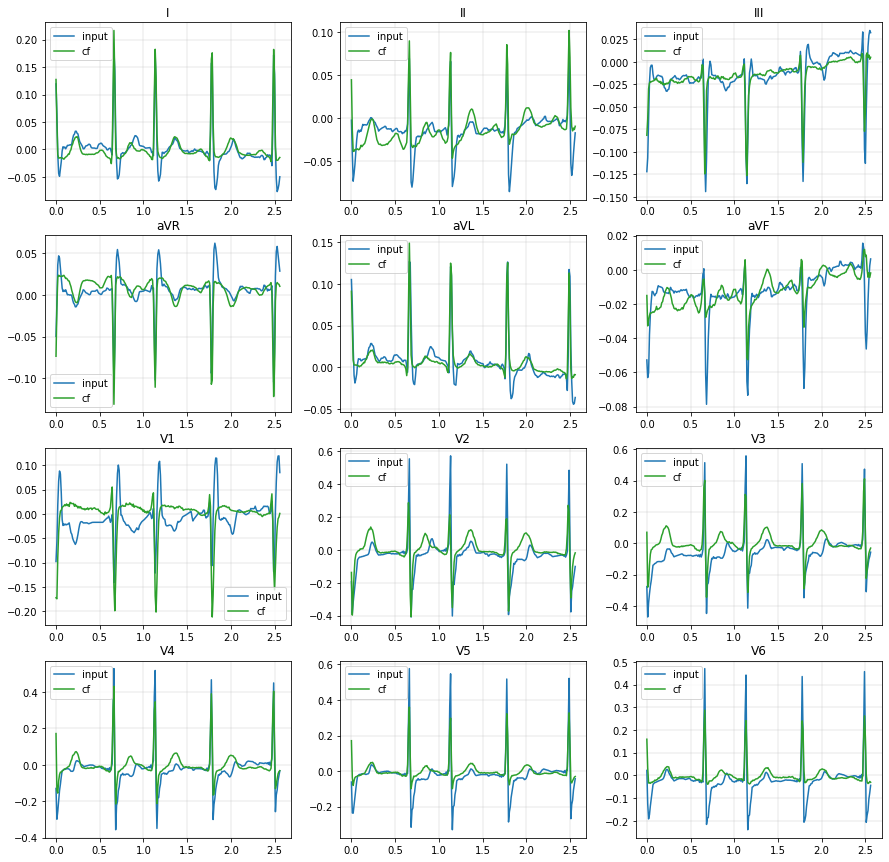

833
label :  [1. 0. 0. 0. 0.]
input pred [[1. 0. 0. 0. 0.]]
cf pred  [[0. 0. 0. 1. 0.]]


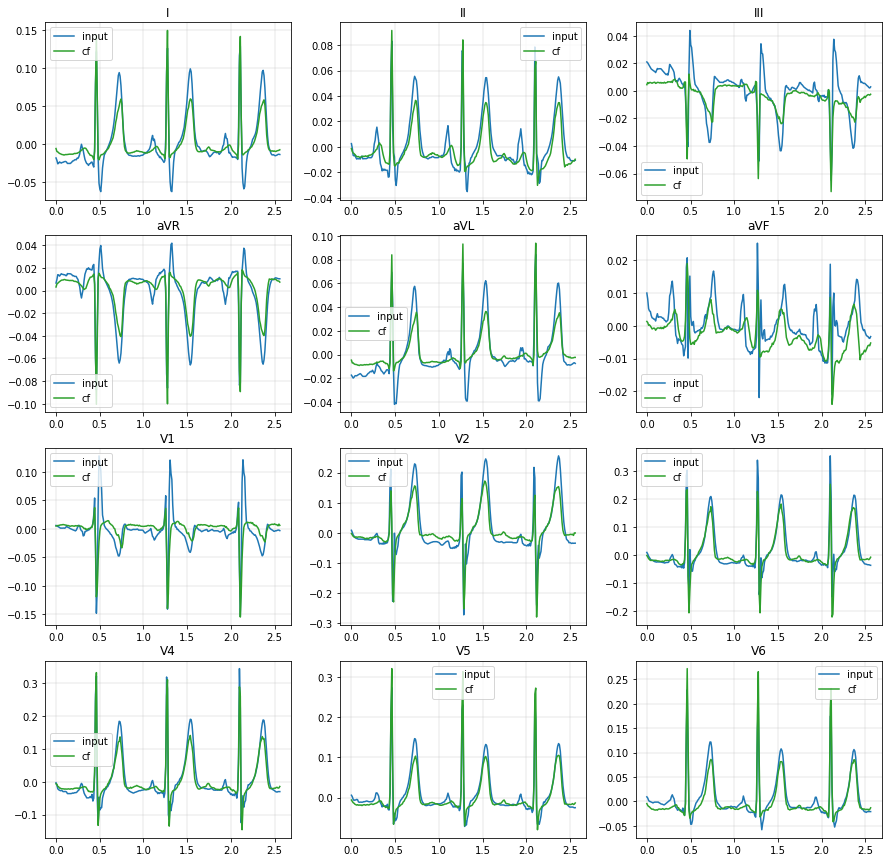

875
label :  [1. 0. 1. 0. 0.]
input pred [[0.933 0.017 0.049 0.001 0.   ]]
cf pred  [[0. 0. 0. 1. 0.]]


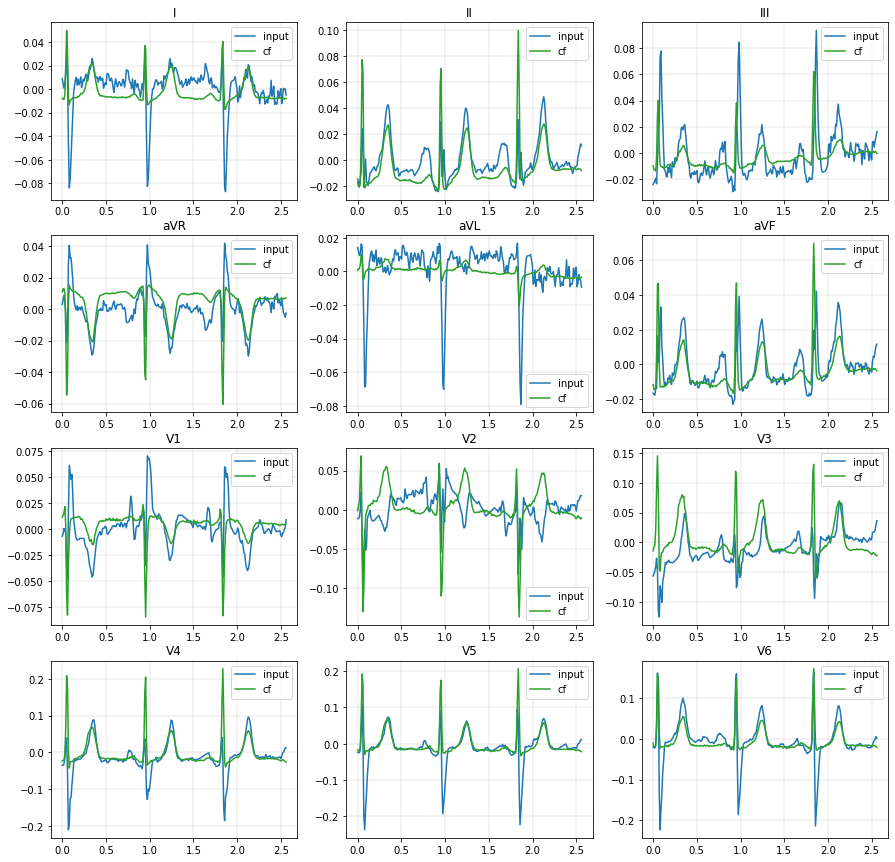

462
label :  [0. 0. 1. 0. 0.]
input pred [[0.044 0.096 0.68  0.007 0.173]]
cf pred  [[0.    0.001 0.    0.999 0.   ]]


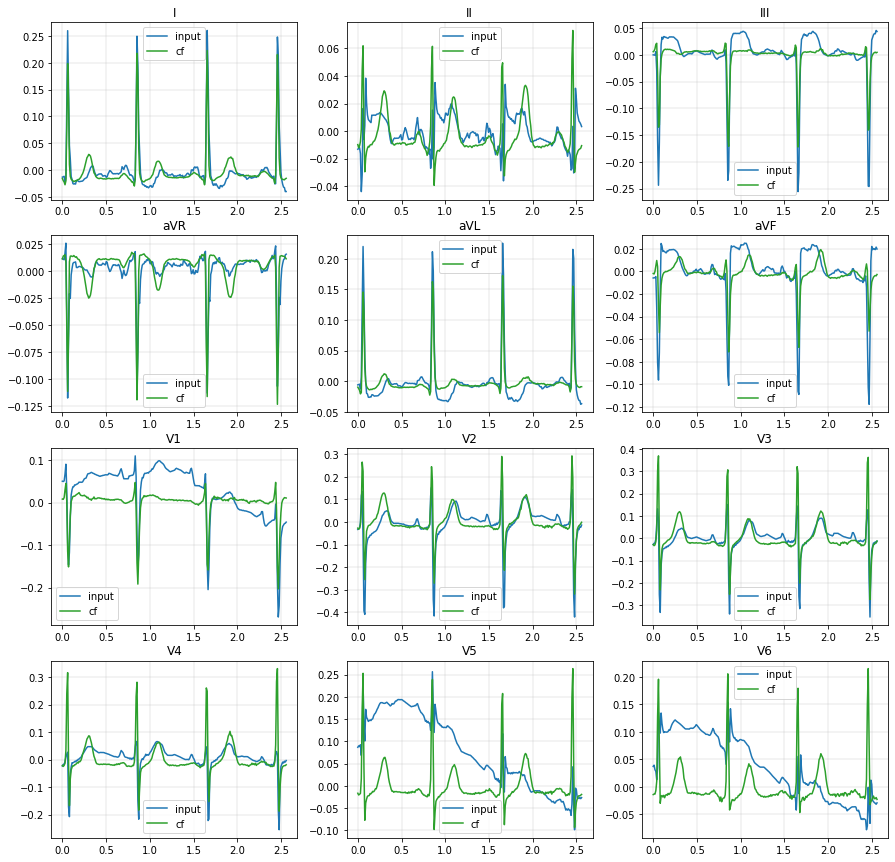

1127
label :  [0. 0. 1. 0. 0.]
input pred [[0.01  0.008 0.361 0.001 0.619]]
cf pred  [[0.    0.    0.001 0.999 0.   ]]


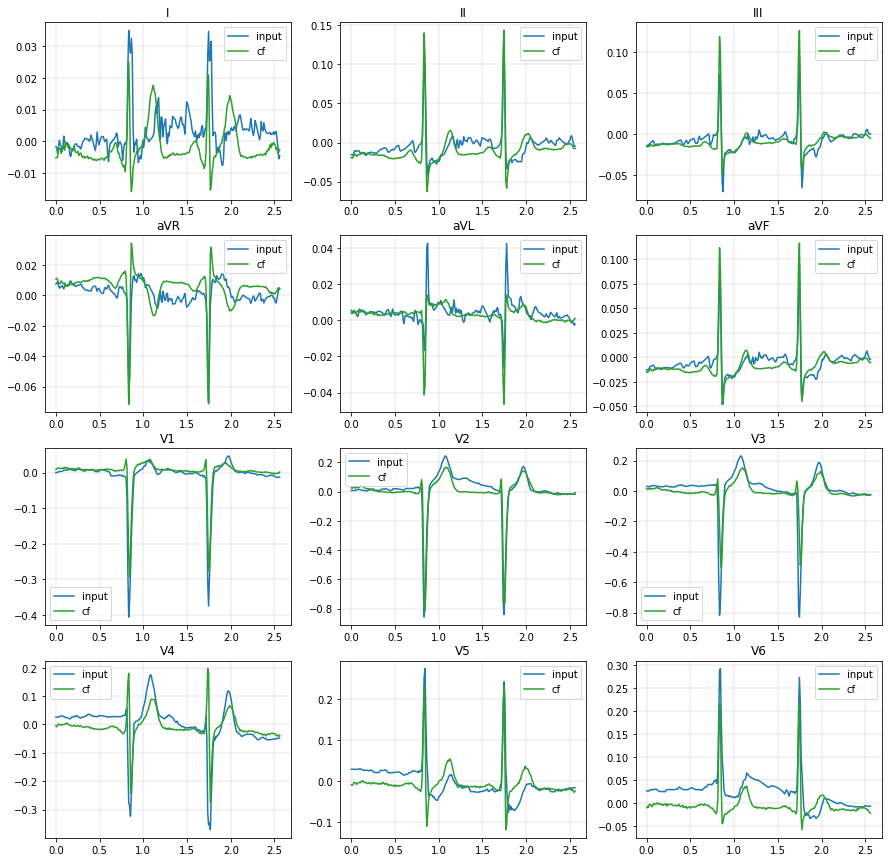

1470
label :  [0. 0. 1. 0. 0.]
input pred [[0. 0. 1. 0. 0.]]
cf pred  [[0. 0. 0. 1. 0.]]


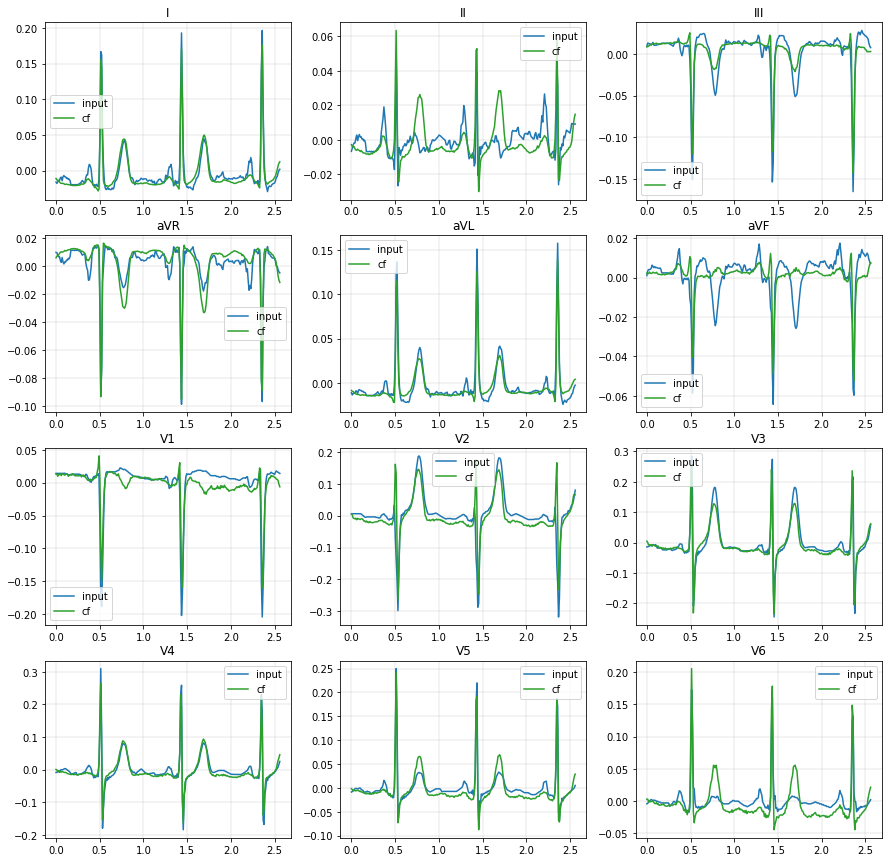

In [51]:
# plot rec 

n = 0
baseline_model.to('cpu')
baseline_model.eval()
plot = False
for target in [511, 833, 875, 462, 1127, 1470]:
        ts_input = x_input_test[target]
        ts_rec = reconstruction_test[target]
        ts_cf = reconstruction_cf_sub[target]
        print(f'{target}')
        print('label : ',y_list[target])
        
        with np.printoptions(precision=3, suppress=True):
            with torch.no_grad():
                print('input pred', torch.nn.functional.softmax(baseline_model(torch.tensor([ts_input])), dim=1).detach().numpy())
                print('cf pred ', torch.nn.functional.softmax(baseline_model(torch.tensor([ts_cf])), dim=1).detach().numpy())
            
        scaler=np.asarray([model.scaler.mean_,model.scaler.var_])
        leads = ['I','II','III','aVR','aVL','aVF','V1','V2','V3','V4','V5','V6']
        
        plt.figure(figsize=(15,15))
        for i in range(12):
            plt.subplot(4,3,i+1)
            plt.title(leads[i])
            plt.plot(np.linspace(0,2.56,256),(ts_input[i]*scaler[1][i])+scaler[0][i], label='input')
            #plt.plot(np.linspace(0,2.56,256),(ts_rec[i]*scaler[1][i])+scaler[0][i], color='C1', label='rec')
            plt.plot(np.linspace(0,2.56,256),(ts_cf[i]*scaler[1][i])+scaler[0][i], color='C2', label='cf')
            plt.grid(linewidth=.3)
            plt.legend()
        if plot:
            plt.savefig(f'{plot_path}/ts_cf_{target}.png', dpi=300)
        else : 
            plt.show()

        